In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('C:/trabalhodados/ecomm.data.csv')

In [2]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Replace missing values with 0 in column: 'Rating'
    df = df.fillna({'Rating': 0})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,ProductID,ProductName,Category,Price,QuantitySold,Promotion,Discount,Rating,CustomerAge,CustomerGender,CustomerLocation,PurchaseDate
0,1001,Badminton Set,Electronics,50.0,77,Yes,32,4.0,64,Female,Australia,2022-01-01
1,1002,Curtains,Electronics,196.0,38,Yes,45,0.0,24,Male,China,2022-01-02
2,1003,Hoodie,Beauty,336.0,8,No,4,0.0,36,Male,India,2022-01-03
3,1004,Mascara,Beauty,191.0,78,No,42,1.0,39,Male,Australia,2022-01-04
4,1005,Gaming Console,Sports,102.0,74,No,47,0.0,52,Female,Russia,2022-01-05


In [3]:
# Calcula a mediana apenas do item Sweater, ignorando valores nulos
mediana_sweater = df_clean.loc[df['ProductName'] == 'Sweater', 'Price'].median()

# Preenche apenas os valores nulos do item Sweater
df_clean.loc[(df_clean['ProductName'] == 'Sweater') & (df_clean['Price'].isnull()), 'Price'] = mediana_sweater

print("\nDepois do preenchimento:\n", df_clean)



Depois do preenchimento:
      ProductID     ProductName       Category  Price  QuantitySold Promotion  \
0         1001   Badminton Set    Electronics   50.0            77       Yes   
1         1002        Curtains    Electronics  196.0            38       Yes   
2         1003          Hoodie         Beauty  336.0             8        No   
3         1004         Mascara         Beauty  191.0            78        No   
4         1005  Gaming Console         Sports  102.0            74        No   
..         ...             ...            ...    ...           ...       ...   
995       1996    Coffee Maker         Sports  118.0            17       Yes   
996       1997   Exercise Bike  Home & Garden  180.0             0       Yes   
997       1998           Blush    Electronics  136.0            54        No   
998       1999          Camera         Sports  267.0            96        No   
999       2000   Tennis Racket    Electronics  470.0             8       Yes   

     Discoun

In [4]:
# Calcula a mediana de preços de todos os itens que estão nulos de acordo com o seu tipo
df_clean['Price'] = df_clean['Price'].fillna(
    df_clean.groupby('ProductName')['Price'].transform('median')
)

In [5]:
#Pergunta 1:

# Cria um novo DataFrame com a média de vendas de cada item por pais 
df_media_paises = df_clean.groupby(['CustomerLocation', 'ProductName'], as_index=False)['QuantitySold'].mean()

print("\n média de vendas por país: \n", df_media_paises)


 média de vendas por país: 
     CustomerLocation       ProductName  QuantitySold
0          Australia      Air Purifier         51.00
1          Australia     Badminton Set         52.50
2          Australia        Basketball         60.00
3          Australia               Bed         -8.00
4          Australia            Camera         54.00
..               ...               ...           ...
540    United States     Tennis Racket         90.00
541    United States         Treadmill         62.00
542    United States    Vacuum Cleaner         75.00
543    United States  Wireless Earbuds         37.50
544    United States          Yoga Mat         63.25

[545 rows x 3 columns]


In [6]:
df_clean.describe()

,ProductID,Price,QuantitySold,Discount,Rating,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1500.500000,272.499000,43.293000,24.966000,2.92800,40.347000
std,288.819436,128.567418,31.107183,14.346521,1.66541,13.269237
min,1001.000000,50.000000,-10.000000,0.000000,0.00000,18.000000
25%,1250.750000,166.000000,17.000000,13.000000,2.00000,29.000000
50%,1500.500000,270.000000,41.000000,25.000000,3.00000,40.000000
75%,1750.250000,383.500000,70.000000,37.250000,4.00000,52.000000
max,2000.000000,499.000000,99.000000,49.000000,5.00000,64.000000


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductID         1000 non-null   int64  
 1   ProductName       1000 non-null   object 
 2   Category          1000 non-null   object 
 3   Price             1000 non-null   float64
 4   QuantitySold      1000 non-null   int64  
 5   Promotion         1000 non-null   object 
 6   Discount          1000 non-null   int64  
 7   Rating            1000 non-null   float64
 8   CustomerAge       1000 non-null   int64  
 9   CustomerGender    1000 non-null   object 
 10  CustomerLocation  1000 non-null   object 
 11  PurchaseDate      1000 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB


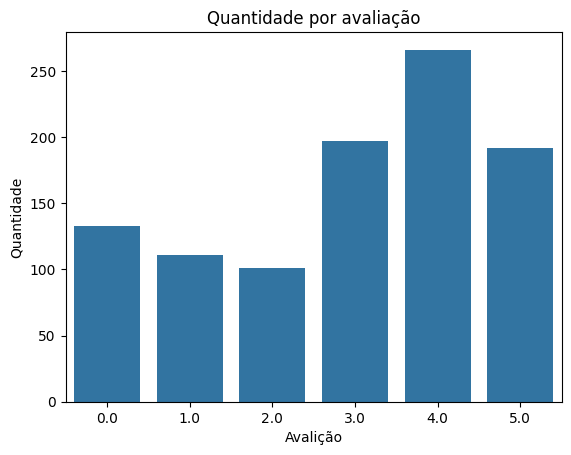

In [ ]:
sns.countplot(x='Rating', data=df_clean)

plt.title('Quantidade por avaliação')
plt.ylabel('Quantidade')
plt.xlabel('Avalição')

plt.show()